# 시험장 환경 정보

Python: 3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]

|모듈|버젼|
|----|----|
|pandas|0.25.1|
|numpy|1.18.5|
|sklearn|0.21.3|
|scipy|1.5.2|
|mlxtend|0.15.0.0|
|statsmodels|0.11.1|

In [1]:
# 실행 환경 확인

import pandas as pd
import numpy as np
import sklearn
import scipy
import statsmodels
import mlxtend
import sys

print(sys.version)
for i in [pd, np, sklearn, scipy, mlxtend, statsmodels]:
    print(i.__name__, i.__version__)

3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]
pandas 0.25.1
numpy 1.18.5
sklearn 0.21.3
scipy 1.5.2
mlxtend 0.15.0.0
statsmodels 0.11.1


In [2]:
# 시각화 모듈 설정
# 참고용 차트를 출력하기 위함

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

# 문제 개요

다음은 폴더블 폰의 힌지에 들어가는 스프링 내구력을 테스트한 실험 결과이다. 

스프링 측정값과 스프링에 가한 부하 정보와 함께, 테스트 통과/실패 (failure) 결과가 기재되어 있다. 

개발부서는 테스트 비용을 줄이기 위해 failure 여부를 맞추는 모델을 만들고자 한다.

변수명은 보안을 위해 measurement_0과 같이 익명화되었다.

데이터 구성

학습데이터: train_prob.csv, 21,458 rows, 25 columns

테스트데이터: test_prob.csv, 5,112 rows, 24 columns, 

테스트정답셋: test_prob_ans.csv, 5,112 rows, 1 columns


컬럼명	설명	타입

|변수명|설명|타입|
|--|--------------|------|
|id|실험 고유 번호|정수형|
|product_code|스프링 코드|범주형|
|loading|스프링에 가한 부하|실수형|
|attribute_0|구성 소재1|범주형|
|attribute_1|구성 소재2|범주형|
|attribute_2|구성 소재3|정수형|
|attribute_3|구성 소재4|정수형|
|measurement_0 ~ 17|측정값 0~17|실수형|
|failure|성공여부|이진형(0, 1)|


In [27]:
df_basetable = pd.read_csv('train_prob.csv', index_col='id')
df_basetable

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,E,158.95,material_7,material_6,6,9,6,16,4,16.301,...,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,E,146.02,material_7,material_6,6,9,10,12,8,17.543,...,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,E,115.62,material_7,material_6,6,9,1,10,1,15.670,...,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0


In [28]:
df_basetable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21458 entries, 0 to 26569
Data columns (total 25 columns):
product_code      21458 non-null object
loading           21257 non-null float64
attribute_0       21458 non-null object
attribute_1       21458 non-null object
attribute_2       21458 non-null int64
attribute_3       21458 non-null int64
measurement_0     21458 non-null int64
measurement_1     21458 non-null int64
measurement_2     21458 non-null int64
measurement_3     21146 non-null float64
measurement_4     21016 non-null float64
measurement_5     20893 non-null float64
measurement_6     20818 non-null float64
measurement_7     20692 non-null float64
measurement_8     20605 non-null float64
measurement_9     20469 non-null float64
measurement_10    20399 non-null float64
measurement_11    20278 non-null float64
measurement_12    20171 non-null float64
measurement_13    20063 non-null float64
measurement_14    19976 non-null float64
measurement_15    19855 non-null float64
me

# 전처리(Preprocessing)

train_prob.csv를 불러 온다. 이를 basetable이리고 한다.

# 단계 1

basetable에 measurement_3 ~17 각각의 행이 결측인지 나타내는 파생 변수를 만든다. 

파생 변수는 이진 형식이고, False는 미결측 True는 결측을 의미한다. 

파생 변수의 이름은 measurement 번호에 따라 isna_3 ~ 17로 한다. 

In [29]:
df_basetable[['isna_{}'.format(i) for i in range(3, 18)]] = \
        df_basetable[['measurement_{}'.format(i) for i in range(3, 18)]].isna()
df_basetable[['isna_{}'.format(i) for i in range(3, 18)]].sum()

isna_3      312
isna_4      442
isna_5      565
isna_6      640
isna_7      766
isna_8      853
isna_9      989
isna_10    1059
isna_11    1180
isna_12    1287
isna_13    1395
isna_14    1482
isna_15    1603
isna_16    1708
isna_17    1818
dtype: int64

## 단계 2

이 과제를 맡은 데이터분석가 지희는 measurement_3~17의 결측치 처리 방안을 고민하던 중, 

개발부서에서 measurement_17은 product_code별로 failure를 예측하기 위해 

measurement_3 ~ measurement_9을 다음과 같이 선형 조합하여 생성한 값이라는 정보를 받았다. 

$measurement_{17}=\beta_{3}measurement_{3}+\beta_{4}measurement_{4}+...+\beta_{9}measurement_{9}$

이는 즉,

$measurement_{3}=\beta'_{4}measurement_{4}+\beta'_{5}measurement_{5}+...+\beta'_{9}measurement_{9}+\beta'_{17}measurement_{17}$

...

$measurement_{9}=\beta''_{3}measurement_{3}+\beta''_{4}measurement_{4}+...+\beta''_{8}measurement_{8}...+\beta''_{17}measurement_{17}$

와 같이 measurement_3 ~ measurement_9의 각 변수들도 나머지 변수들과 선형 관계를 지닌다. 

이 점을 이용하여 대상 변수를 번갈아 가면서 예측 모델을 만들어 최대한 원래 값에 가깝게 복원할 수 있다. 

이러한 반복적인 결측치 복원 방법을 사내 데이터분석 연구소에 문의 했더니 다음과 같은 가이드를 주었다. 

> sklearn 모듈에 아직은 실험 단계이지만, 비슷한 경우에 문제 없이 사용했던 사례가 있어 의견을 드립니다. 

> from sklearn.experimental import enable_iterative_imputer 구문을 사용하여 실험 단계인 모듈을 활성화하고, 

> sklearn.impute.IterativeImputer를 사용한다면 원하는 결과를 얻을 수 있습니다.

가이드의 내용을 참조하여 basetable의 measurement_3~9와 measurement_17 결측치를 복원하라.


입력 변수] measurement_3 ~ 9, measurement_17 (입력 변수 순서에 유의)

---
**함수가이드**

sklearn.experimental.enable_iterative_imputer

sklearn.impute.IterativeImputer, random_state=123

sklearn.linear_model.LinearRegression

문제 지시사항 외 Default 값 사용

---


In [13]:
# Tip: 수준별로 모델을 만들어 예측해봅니다

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_lr = ['measurement_{}'.format(i) for i in range(3, 10)]

# groupby ~ apply를 통해 수준별로 구분한 DataFrame을 받고,
# 각각의 수준별로 학습한 결과는 Series로 받게 됩니다.
s_lr = df_basetable[X_lr + ['measurement_17', 'product_code']]\
                    .dropna()\
                    .groupby('product_code')\
                    .apply(
                        lambda x: LinearRegression().fit(x[X_lr], x['measurement_17'])
                    )
# 예측할 때는 groupby ~ apply를 사용하고
# apply에 넘어오는 DataFrame의 name attribute를 이용하여
# 받은 DataFrame에 해당하는 수준을 가지고 Series에 저장된 모델을 가져오고,
# 예측을 합니다.
df_basetable[X_lr + ['measurement_17', 'product_code']]\
            .dropna()\
            .groupby('product_code')\
            .apply(
                lambda x: r2_score(x['measurement_17'], s_lr.loc[x.name].predict(x[X_lr]))
            )

product_code
A    0.999978
B    0.999979
C    0.999982
E    0.999987
dtype: float64

In [15]:
from sklearn.experimental import enable_iterative_imputer # 구문을 사용하여 실험 단계인 모듈을 활성화 
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
# 처음 사용해보는 기능인 만큼 
# 수준별로 적용하기 전에
# 요건에 맞춰 모델을 설정하고,
# 테스트 삼에 사용해 봅니다.
imp = IterativeImputer(
    estimator=LinearRegression(),
    random_state=123
)
X_imp = ['measurement_{}'.format(i) for i in range(3, 10)] + ['measurement_17']
imp.fit_transform(df_basetable[X_imp])

array([[ 18.04      ,  12.518     ,  15.748     , ...,  20.155     ,
         10.672     , 764.1       ],
       [ 18.213     ,  11.54      ,  17.717     , ...,  17.889     ,
         12.448     , 682.057     ],
       [ 18.057     ,  11.652     ,  16.738     , ...,  18.288     ,
         12.715     , 663.376     ],
       ...,
       [ 15.67      ,  11.535     ,  16.778     , ...,  19.279     ,
         11.407     , 750.364     ],
       [ 18.059     ,  11.75609142,  16.918     , ...,  19.358     ,
         11.392     , 730.156     ],
       [ 18.034     ,  11.431     ,  16.918     , ...,  18.731     ,
         10.611     , 602.354     ]])

In [24]:
# 방법 1: groupby ~ apply - 위의 Tip을 적용해봅니다.

from sklearn.experimental import enable_iterative_imputer# 구문을 사용하여 실험 단계인 모듈을 활성화하고, 
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_imp = ['measurement_{}'.format(i) for i in range(3, 10)] + ['measurement_17']
# 수준별로 결측 보간 모델을 만들고 학습합니다.
s_imp = df_basetable[X_imp + ['measurement_17', 'product_code']]\
                    .groupby('product_code')\
                    .apply(
                        lambda x: IterativeImputer(estimator=LinearRegression(),random_state=123).fit(x[X_imp])
                    )
# 모델을 적용하여 결측이 처리된 데이터프레임을 만듭니다.
# apply에서 transform에서 numpy array를 넘겨 주므로, 
# DataFrame을 만들어 반환시켜주면,
# apply에서 DataFrame으로 재구성하여 넘겨줍니다.
df_basetable[X_imp] = df_basetable[X_imp + ['product_code']]\
            .groupby('product_code')\
            .apply(
                lambda x: pd.DataFrame(s_imp.loc[x.name].transform(x[X_imp]), index=x.index, columns=X_imp)
            )

df_basetable[X_imp].isna().sum()

measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_17    0
dtype: int64

In [145]:
# 참고로, 위 과정을 fit_transform을 사용하여 한 번에 할 수도 있습니다.
imp = IterativeImputer(estimator=LinearRegression(),random_state=123) 
df_basetable[X_imp + ['product_code']]\
    .groupby('product_code')\
    .apply(
        lambda x:  pd.DataFrame(imp.fit_transform(x[X_imp]), index=x.index, columns=X_imp)
    )

,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_17
id,,,,,,,,
0,18.040,12.518000,15.748,19.292,11.739,20.155,10.672000,764.100
1,18.213,11.540000,17.717,17.893,12.748,17.889,12.448000,682.057
2,18.057,11.652000,16.738,18.240,12.718,18.288,12.715000,663.376
3,17.295,11.188000,18.576,18.339,12.583,19.060,12.471000,826.282
4,19.346,12.950000,16.990,15.746,11.306,18.093,10.337000,579.885
...,...,...,...,...,...,...,...,...
26565,16.301,13.259000,18.068,15.505,10.865,19.354,11.738932,729.131
26566,17.543,10.695693,17.984,19.078,11.139,19.563,11.242000,853.924
26567,15.670,11.535000,16.778,18.385,11.630,19.279,11.407000,750.364


In [31]:
# 방법 2: 반복문을 이용합니다.

X_imp = ['measurement_{}'.format(i) for i in range(3, 10)] + ['measurement_17']
for i in df_basetable['product_code'].unique():
    s_bidx = df_basetable['product_code'] == i
    imp = IterativeImputer(estimator=LinearRegression(),random_state=123).fit(df_basetable.loc[s_bidx, X_imp])
    # 값을 대입할 때, 대입에 대상이 되는 데이터프레임을
    # df_basetable.loc[s_bidx][X_imp] 이런식으로 filtering -> 컬럼선택 2단계로 할 경우 reference 경고를 받게 됩니다.
    # df_basetable.loc[s_bidx, X_imp] filtering과 columns 선택을 하여 중간에 reference DataFrame 없이 처리하도록 합니다.
    df_basetable.loc[s_bidx, X_imp] = imp.transform(df_basetable.loc[s_bidx, X_imp])
df_basetable[X_imp].isna().sum()

measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_17    0
dtype: int64

## 단계 3

measurement_10~16까지의 결측치는 모두 product_code별 평균으로 대치한다.

In [34]:
# 방법1
X_mean = ['measurement_{}'.format(i) for i in range(10, 17)]
df_basetable[X_mean] = \
            df_basetable.groupby('product_code')[X_mean]\
                    .apply(lambda x: pd.DataFrame(x.fillna(x.mean()), index=x.index, columns=X_mean))

In [40]:
# 방법 2
X_mean = ['measurement_{}'.format(i) for i in range(10, 17)]
df_basetable[X_mean] = \
        df_basetable.groupby('product_code')[X_mean]\
                .transform(lambda x: x.fillna(x.mean()))

,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16
id,,,,,,,
0,15.859,17.594000,15.193,15.029,16.110886,13.034,14.684000
1,17.947,17.915000,11.755,14.732,15.425000,14.395,15.631000
2,15.607,19.439558,13.798,16.711,18.631000,14.094,17.946000
3,16.346,18.377000,10.020,15.250,15.562000,16.154,17.172000
4,17.082,19.932000,12.428,16.182,12.760000,13.153,16.412000
...,...,...,...,...,...,...,...
26565,12.177,17.942000,10.112,15.795,18.572000,16.144,16.066552
26566,14.179,20.564000,10.234,14.450,14.322000,13.146,16.471000
26567,16.437,17.476000,8.668,15.069,16.599000,15.590,14.065000


Hint] 전처리 단계에서 보간 결과를 확인해 보기 위한 각 변수의 평균과 표본표준편차.

| |3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|
|-|-|-|-|-|-|-|-|--|--|--|--|--|--|--|--|
|mean|17.796|11.736|17.131|17.506|11.719|19.022|11.434|16.034|19.194|11.734|15.666|16.033|15.051|16.398|701.768|
|std|0.997|0.994|0.994|0.992|0.993|1.005|0.997|1.278|1.579|1.433|1.149|1.461|1.478|1.671|119.180|

열의 이름의 숫자는 measurement_ 번호, 값은 소수점 3째 자리까지 반올림

In [44]:
df_basetable[['measurement_{}'.format(i) for i in range(3, 18)]].agg(['mean', 'std'])\
        .rename(columns=lambda x: x.split('_')[1])\
        .apply(lambda x: round(x, 3))

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
mean,17.796,11.736,17.131,17.506,11.719,19.022,11.434,16.034,19.194,11.734,15.666,16.033,15.051,16.398,701.768
std,0.997,0.994,0.994,0.992,0.993,1.005,0.997,1.278,1.579,1.433,1.149,1.461,1.478,1.671,119.180


# 문제1

(basetable을 사용) measurement_3~16까지 결측 여부가 failure에 영향이 있는지를 파악하고, 

failure를 분류하는 데 도움이 될 만한 것은 예측 모델의 입력 변수로 사용하고자 한다. 

이를 위해 전처리 과정에서 뽑아낸 isna_3~16을 활용한다.

n이 3부터 16까지, 즉 measurement_3~16까지 다음의 검정을 수행한다. 

$H_0: P(failure=True|measurement_{n}=Missing)=P(failure=True)$

$H_1: P(failure=True|measurement_{n}=Missing) \neq P(failure=True)$

모집단의 $P(failure=True) = 0.2114$


## 단계 1-1

우선, measurement_3으로 위 검정을 시행해보자.

$H_0: P(failure=True|isna_{3}=True)=0.2114$

$H_1: P(failure=True|isna_{3}=True) \neq 0.2114$

으로 바꿀 수 있다.

$P(failure=True|isna_{3}=True)$은 표본수가 충분하여 중심극한정리에 의해 정규분포를 따르는 것은 분석가 간에 이견이 없다고 한다. 

위 검정의 p-value를 구하여 보고 힌트에 주어진 p-value와 비교하여 검정 방법에 문제가 없음을 확인하라.

---

**함수 가이드**

 scipy.stats 에서 제공 기능 활용
 
 문제 지시사항 외 Default 값 사용
 
---

 Hint] p-value는 0.0037(소수점 다섯째 자리에서 반올림하여 넷째 자리까지 표시)


In [54]:
from scipy.stats import norm

# 모집단의 failure가 True인 비율(True = 1로 매칭한다면, 평균)
P_true = 0.2114
# 베르누이 분포의 성질을 이용하면, 모집단의 분산을 구할 수 있습니다. 분산 = p × (1 - p)
P_var = P_true * (1 - P_true)
# 표본의 평균은 모집단의 평균과 같습니다.
P_sample_true = P_true
# 표본의 분산은 = 모집단의 분산 / 표본수
# 표본의 분산을 구하기 위해 표본의 수를 구합니다. 
n_sample = df_basetable['isna_3'].sum()
P_sample_var = P_var / n_sample

# 표본에서 관측한 비율(평균)을 구합니다.
P_observed_true = df_basetable.loc[df_basetable['isna_3'], 'failure'].mean()
# 검정통계량을 구합니다. 
# 양측 검증이라 적용의 편의성을 위해
# 표준화 후 좌측 꼬리의 검정통계량을 구하기 위해, 절대값에 마이너스를 취합니다.
Z = -abs((P_observed_true - P_sample_true) / (P_sample_var ** 0.5))
# 누적분포함수를 이용하여 좌측 꼬리 영역을 구하고 x 2 를 해주어 양쪽 영역을 구합니다.
pvalue = norm.cdf(Z) * 2

P_true, P_var, P_sample_true, P_sample_var, P_observed_true, Z, pvalue

(0.2114,
 0.16671004,
 0.2114,
 0.0005343270512820513,
 0.14423076923076922,
 -2.905807189028007,
 0.0036630709140241546)

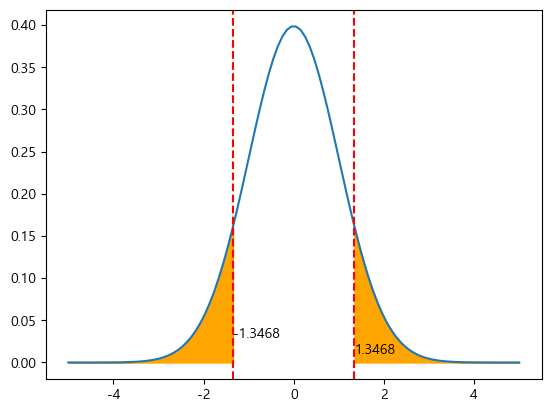

In [50]:
# 표준정규 분포를 이용한 pvalue 도출을 그래프로 설명해봅니다
from scipy.stats import norm
col = 'isna_{}'.format(4)
P_var = P_true * (1 - P_true)
n_samples = df_basetable[col].sum()
P_missing_true = df_basetable.loc[df_basetable[col], 'failure'].mean()
P_missing_var = P_var / n_samples
P_missing_std = P_missing_var ** 0.5

stat = -abs((P_missing_true - P_true) / P_missing_std)

plt.plot(np.linspace(-5, 5, 100), norm.pdf(np.linspace(-5, 5, 100)))
plt.axvline(stat, color='red', linestyle='--')
plt.text(stat, 0.03, str(stat)[:7])
plt.axvline(-stat, color='red', linestyle='--')
plt.text(-stat, 0.01, str(-stat)[:6])
plt.fill_between(np.linspace(-5, stat, 100), np.zeros(shape=100),
                norm.pdf(np.linspace(-5, stat, 100)), color='orange')
plt.fill_between(np.linspace(-stat, 5, 100), np.zeros(shape=100),
                norm.pdf(np.linspace(-stat, 5, 100)), color='orange')

plt.show()

In [56]:
# 이론시간에 다루었던 statsmodels의 기능을 활용하여 위 검정을 해봅니다.
from statsmodels.stats.proportion import proportions_ztest
proportions_ztest(
    df_basetable.loc[df_basetable['isna_3'], 'failure'].sum(), # positive(failure=True)인 빈도수
    df_basetable['isna_3'].sum(), # 표본의 수
    0.2114, # 모집단의 비율
    alternative = 'two-sided', # 검정의 종류
    prop_var = 0.2114 # 베르누이 분포의 분산을 계산할 때의 비율 (모집단의 비율과 동일하게 설정합니다.)
)

(-2.905807189028007, 0.0036630709140241546)

## 단계 1-2

measuremenet_3을 포함하여 measurement_4 ~ 16까지 위 검정을 반복하고 

귀무가설을 기각할 수 있는 경우의 p-value의 합을 A라고 한다. (유의 수준은 5%로 한다.)

In [58]:
# 반복문을 통하여 나머지 변수에 대해서도 검정을 합니다.
from scipy.stats import norm

P_true = 0.2114
P_var = P_true * (1 - P_true)

A = 0
for i in range(3, 17):
    col = 'isna_{}'.format(i)
    n_sample = df_basetable[col].sum()
    P_sample_true = P_true
    P_sample_var = P_var / n_sample
    P_observed_true = df_basetable.loc[df_basetable[col], 'failure'].mean()
    Z = -abs((P_observed_true - P_sample_true) / (P_sample_var ** 0.5))
    pvalue = norm.cdf(Z) * 2
    if pvalue >= 0.05:
        print(col, Z, pvalue) # 귀무가설을 채택합니다
    else:
        print("*", col, Z, pvalue) # 귀무가설을 기각합니다.
        A += pvalue
A

* isna_3 -2.905807189028007 0.0036630709140241546
isna_4 -1.3468241702718833 0.17803686833140808
* isna_5 -2.2213833417706925 0.026325008335499278
isna_6 -0.2617796136561279 0.793491357072205
isna_7 -0.8909035498642803 0.37298091572329806
isna_8 -0.6980509343383379 0.48514534123655306
isna_9 -0.5393439841397007 0.589649524697301
isna_10 -0.7622002829475777 0.44594047726157915
isna_11 -0.1035248797832757 0.9175464043670771
isna_12 -0.6095281379895136 0.5421744277936988
isna_13 -0.45265767845606597 0.6507952588133231
isna_14 -0.681066949794218 0.49582912857498873
isna_15 -0.0076954319495023404 0.9938599942603648
isna_16 -0.4783142261813061 0.6324265724265041


0.029988079249523434

## 단계 1-3

검정 결과 귀무가설을 기각할 수 있는 경우는 총 두 건이다. 

해당 파생 변수명의 뒷 자리 번호 순으로 na_1, na_2로 파생 변수를 만들어 prob1 데이터셋을 생성하라.

In [59]:
# assign을 통하여 파생 변수를 추가하는 동시에 deep copy를 합니다.
df_prob1 = df_basetable.assign(
    na_1 = df_basetable['isna_3'],
    na_2 = df_basetable['isna_5'],
)

A의 값을 소수점 넷째 자리에서 반올림하여 셋째 자리까지 출력하시오. 

**0.030**

# 문제 2

첫째는 스프링 개발 업체들은 실험이 제품 별로 공정하게 진행이 됐는지를 의문을 가지고 있다.

product_code에 따라 개발 업체가 다르다. 

product_code에 대해서 스프링에 가한 부하(loading)를 동일하게 했는지 조사하라.

둘째는, attribute_0와 attribute_1은 스프링을 구성하는 주요 소재이다. 

failure와는 관계가 없음이 이전에 검증되었다. 

하지만, 이에 대한 재확인 요청을 받아 attribute_0와 attribute_1은 failure와 상관없음을 확인한다.

이를 위해 다음 단계를 수행하라.


## 단계 2-1

prob1에서 입력 변수 loading에 결측이 없는 행들을 뽑아 prob2 데이터프레임을 만든다.

Hint] prob2의 데이터 수는 21,257 이다.


In [63]:
df_prob2 = df_prob1.loc[df_prob1['loading'].notna()].copy()
df_prob2.shape

(21257, 42)

## 단계 2-2

prob2에 loading의 각 행들에 자연 로그 함수를 적용하여 파생 변수 loading_log를 만든다.


In [67]:
df_prob2['loading_log'] = np.log(df_prob2['loading'])

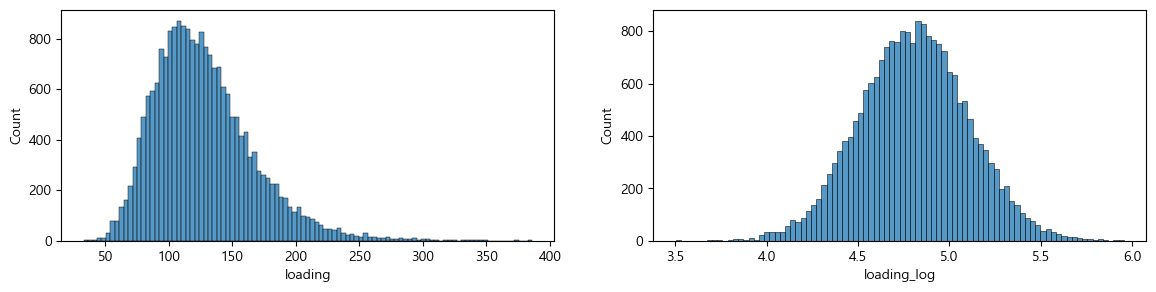

In [68]:
# 로그 변환이 어떤 효과를 보였는지, 보여주기 위한 참고용 코드입니다.
# 좌측으로 치우친 loading 변수가 log 변환을 통해 좌우 대칭형으로 변환되었음을 확인할 수 있습니다.

fig, axes = plt.subplots(1, 2, figsize=(14, 3) )
sns.histplot(data=df_prob2, x='loading', ax=axes[0])
sns.histplot(data=df_prob2, x='loading_log', ax=axes[1])
plt.show()

In [90]:
# 참고 사항 입니다: Kolmogorov-smironof  test를 이용하여 정규성 검정을 해봅니다.
from scipy.stats import kstest, norm, zscore
# one-sample test이므로, 첫 번째 매개변수(rvs) 대상 표본집합, 그리고, 두 번째 매개변수(cdf)에는 norm.cdf(누적분포함수)를 적용합니다.
# norm.cdf 기본설정이 loc(평균)=0 , scale(표준편차)=1이므로, 표집을 표준화해서 넘겨야, 정규성 검정이 성립합니다.
# 표준화시 표본표준편차를 사용했습니다.
# pandas의 std, var의 기본설정은 표본표준편차(ddof=1)입니다.
# 반면, numpy, zscore의 기본설정은 모표준편차(ddof=0)입니다.
(
    kstest(zscore(df_prob2['loading'], ddof=1), norm.cdf),
    kstest((df_prob2['loading'] - df_prob2['loading'].mean()) / df_prob2['loading'].std(), norm.cdf)
)

(KstestResult(statistic=0.0600601378226141, pvalue=4.251798083024511e-67),
 KstestResult(statistic=0.0600601378226141, pvalue=4.251798083024511e-67))

In [87]:
import functools
# 표준화하지 않고 functools의 partial 함수를 이용하여 norm.cdf의 default 설정을 변경해서 풀어 봅니다.
kstest(
    df_prob2['loading'],
    functools.partial(norm.cdf, loc=df_prob2['loading'].mean(), scale=df_prob2['loading'].std(ddof=1))
)

KstestResult(statistic=0.0600601378226141, pvalue=4.251798083024511e-67)

In [84]:
kstest(zscore(df_prob2['loading_log'], ddof=1), norm.cdf)

KstestResult(statistic=0.004268034315027425, pvalue=0.8318549070535131)

## 단계 2-3

loading_log가 product_code 각각에 대해서 정규성을 지니고 있는지 확인하고자 한다.

이를 위해 Jarque-Bera로 검정하고 결과의 p-value가 0.05가 넘는 product_code의 수를 B라고 하자.

---

**함수 가이드**

 scipy.stats 에서 제공 기능 활용
 
 문제 지시사항 외 Default 값 사용
 
---


In [94]:
# 방법1: 반복문을 이용해봅니다.
from scipy.stats import jarque_bera
B = 0
for i in df_prob2['product_code'].unique():
    result_jb = jarque_bera(df_prob2.loc[df_prob2['product_code'] == i, 'loading_log'])
    print(result_jb)
    if result_jb.pvalue > 0.05:
        B += 1
B

Jarque_beraResult(statistic=1.467731470333654, pvalue=0.4800496537264637)
Jarque_beraResult(statistic=0.6168837955943998, pvalue=0.7345906322931469)
Jarque_beraResult(statistic=7.536229242478234, pvalue=0.023095566154546443)
Jarque_beraResult(statistic=0.04839464502051384, pvalue=0.9760930856160965)


3

In [101]:
# 방법2: groupby를 이용해봅니다
df_jb_result = df_prob2.groupby('product_code')['loading_log']\
        .apply(lambda x: pd.Series(jarque_bera(x), index=['stat', 'pvalue']))\
        .unstack()\
        .pipe(lambda x: x.loc[x['pvalue'] > 0.05])
df_jb_result

,stat,pvalue
product_code,,
A,1.467731,0.480050
B,0.616884,0.734591
E,0.048395,0.976093


In [142]:
B = len(df_jb_result)
B

3

## 단계 2-4

loading_log 변수를 product_code로 구분했을 때, 

등분산성을 보이는지 Bartlett 검정을 통해 확인한다.

검정 결과에서 p-value를 C라고 한다.

---

**함수 가이드**

 scipy.stats 에서 제공 기능 활용
 
 문제 지시사항 외 Default 값 사용
 
---


In [103]:
df_prob2['product_code'].unique()

array(['A', 'B', 'C', 'E'], dtype=object)

In [105]:
# 방법1: 하드코딩으로 해봅니다
from scipy.stats import bartlett
result_2_4 = bartlett(
    df_prob2.loc[df_prob2['product_code'] == 'A', 'loading_log'],
    df_prob2.loc[df_prob2['product_code'] == 'B', 'loading_log'],
    df_prob2.loc[df_prob2['product_code'] == 'C', 'loading_log'],
    df_prob2.loc[df_prob2['product_code'] == 'E', 'loading_log']
)
C = result_2_4.pvalue
result_2_4, C

(BartlettResult(statistic=1.928667047072185, pvalue=0.5873433093297675),
 0.5873433093297675)

In [110]:
# 방법2: groupby ~ agg(list) 와 list unpacking을 이용해봅니다.
result_2_4 = bartlett(
    *df_prob2.groupby('product_code')['loading_log'].agg(list).tolist()
)
C = result_2_4.pvalue
result_2_4, C

BartlettResult(statistic=1.928667047072185, pvalue=0.5873433093297675)

## 단계 2-5

product_code에 대한 분산분석(ANOVA)을 통해서 loading_log 평균에 차이가 있는지 검정한다.

그 결과 중 p-value를 D라고 한다.

---

**함수 가이드**

 scipy.stats 제공 기능 활용
 
 문제 지시사항 외 Default 값 사용
 
---


In [129]:
# 일원산분산분석은 scipy.stats의 함수로 제공되고 있습니다.
# 함수명이 직관적이지 않습니다. 일원산(oneway) 분산분석(f분포사용 ) => f_oneway
# bartlett에서 사용했던 groupby ~ agg(list) 방법을 응용해봅니다.

from scipy.stats import f_oneway
result_2_5 = f_oneway(
    *df_prob2.groupby('product_code')['loading_log'].agg(list).tolist()
)
D = result_2_5.pvalue
result_2_5, D

(F_onewayResult(statistic=0.37177284134760413, pvalue=0.7733782072320899),
 0.7733782072320899)

## 단계 2-6

Chi-square 검정을 통해 attribute_0, attribute_1의 결합값이 failure와 연관이 있는지 조사하라. 

attribute_0, attribute_1의 결합값의 의미 attribute_0=material_7, attribute_1=material_8 이라면, 이 둘의 결합값은
matertial_7material_8를 의미한다.

(유의 수준 1%) 연관이 있다면 E값은 1 없으면 0으로 한다.

---

**함수 가이드**

 scipy.stats.chi2_contingency, correction=False
 
 문제 지시사항 외 Default 값 사용
 
---


$Chi^2$ 검정을 하려면 표집에서 빈도수 테이블 (observed)을 구해야 합니다. 방법을 정리해 봅니다.

In [132]:
# 방법1: pd.crosstab을 이용하는 방법
pd.crosstab(
    index=df_prob2['attribute_0'] + df_prob2['attribute_1'], 
    columns=df_prob2['failure']
)

failure,0,1
row_0,,
material_5material_5,4162,1047
material_7material_6,4181,1100
material_7material_8,8413,2354


In [130]:
# 방법2: pivot_table을 이용한 방법: aggfunc='size'를 넣으면 빈도수를 계산하게 됩니다.
df_prob2[['attribute_0', 'attribute_1', 'failure']].assign(
    attr01 = lambda x: x['attribute_0'] + x['attribute_1']
).pivot_table(index='attr01', columns='failure', aggfunc='size')

failure,0,1
attr01,,
material_5material_5,4162,1047
material_7material_6,4181,1100
material_7material_8,8413,2354


In [131]:
# 방법3: groupby를 이용한 방법: groupby ~ size()는 수준들의 빈도수를 계산하게 됩니다.
# unstack을 통해 index의 하나의 수준을 column에 위치시킵니다.
df_prob2[['attribute_0', 'attribute_1', 'failure']].assign(
    attr01 = lambda x: x['attribute_0'] + x['attribute_1']
).groupby(['attr01', 'failure']).size().unstack()

failure,0,1
attr01,,
material_5material_5,4162,1047
material_7material_6,4181,1100
material_7material_8,8413,2354


In [143]:
from scipy.stats import chi2_contingency
# 빈도수 테이블을 전달을 하고 요건에서 제시한 correction=False로 설정해서 검정 결과를 뽑아냅니다.
result_2_6 = chi2_contingency(
    pd.crosstab(
        index=df_prob2['attribute_0'] + df_prob2['attribute_1'], 
        columns=df_prob2['failure']
    ), correction=False
)
# H0: 독립 -> 연관 x
# H1: 독립 x -> 연관 o
E = 1 if result_2_6[1] < 0.01 else 0
E

0

In [134]:
B, C, D, E, B + C + D + E

(3, 0.5873433093297675, 0.7733782072320899, 0, 4.360721516561858)

B + C + D + E의 값을 소수점 셋째 자리에서 반올림하여 둘째 자리까지 출력하시오.

**4.36**

# 문제 3

로지스틱 회귀모델로 수치형 변수 measurement_0 ~ 17, 

loading과 이진형인 na_1, na_2 중에서 최적의 성능을 보이는 입력 변수들을 찾고자 한다.


## 단계 3-1

prob1을 복사하여 prob3을 만든다. loading의 결측치는 loading의 평균으로 대치한다.  

In [146]:
df_prob3 = df_prob1.copy()
df_prob3['loading'] = df_prob3['loading'].fillna(df_prob3['loading'].mean())

## 단계 3-2: 
    
prob3를 80%는 학습데이터 prob3_train으로 20%는 테스트데이터 prob3_test로 나눈다. 

prob3_train의 failure가 1인 비율과 prob3_test의 failure가 1의 비율을 동일하게 한다.


---

**함수 가이드**

 sklearn.model_selection.train_test_split, random_state=123, 
 
 train과 test의 failure의 비율은 stratify 매개 변수를 이용하여 맞춘다.
 
 문제 지시사항 외 Default 값 사용
 
---

In [148]:
from sklearn.model_selection import train_test_split

df_prob3_train, df_prob3_test = train_test_split(
    df_prob3, train_size=0.80, random_state=123, stratify= df_prob3['failure']
)
df_prob3_train, df_prob3_test = df_prob3_train.copy(), df_prob3_test.copy()

In [149]:
df_prob3_train['failure'].value_counts(normalize=True)

0    0.788535
1    0.211465
Name: failure, dtype: float64

In [150]:
df_prob3_test['failure'].value_counts(normalize=True)

0    0.788677
1    0.211323
Name: failure, dtype: float64

## 단계 3-3

prob3_train의 수치형 입력 변수 loading, measurement_0 ~ 17을 표준화한다. 

prob3_train의 표준화 설정으로 prob3_test의 loading, measurement_0 ~ 17에도 적용한다. 

표준화 처리한 prob3_train과 prob3_test는 문제 4와 문제 5에서 사용한다.


---

**함수 가이드**

 sklearn.preprocessing 제공 기능 활용, 
 
 문제 지시사항 외 Default 값 사용
 
---


In [152]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_std = ['loading'] + ['measurement_{}'.format(i) for i in range(0, 18)]
df_prob3_train[X_std] = std_scaler.fit_transform(df_prob3_train[X_std])
df_prob3_test[X_std] = std_scaler.transform(df_prob3_test[X_std])

In [153]:
df_prob3_train[X_std].agg(['mean', 'std'])

,loading,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
mean,2.139989e-16,-8.920072e-17,-1.080343e-16,-6.871146e-17,2.076245e-15,4.730122e-16,1.432593e-15,-2.142059e-16,-6.689019e-16,-2.198767e-15,-1.998841e-15,3.909517e-16,-1.405532e-15,-4.996068e-16,9.722051e-16,-4.014653e-15,-5.573493e-16,3.583551e-16,-4.008858e-16
std,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00


In [154]:
df_prob3_test[X_std].agg(['mean', 'std'])

,loading,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
mean,-0.012128,0.002899,-0.018824,0.026778,0.008819,0.004858,0.017221,-0.008580,-0.013296,-0.001396,0.022965,-0.003753,-0.000548,0.025345,0.010671,0.016924,-0.001131,0.044992,0.011926
std,0.988545,1.017625,0.978095,1.015628,1.011319,0.986469,0.982998,0.995606,0.982849,1.000750,1.020788,1.021548,0.992102,0.993806,0.998137,1.005824,0.991199,0.999155,0.999505


## 단계 3-4
    
로지스틱 회귀모델을 사용하여 loading, measurement_0~17과 na_1, na_2를 입력 변수로 하여 prob3_train을 학습한다. 

로지스틱 회귀모델을 prob3_test로 성능을 측정한 값을 A라고 한다.

입력 변수: loading, measurement_0~17, na_1, na_2

대상 변수: failure

성능 지표: AUC(area under of ROC curve)

---

**함수 가이드**

 sklearn.linear_model.LogisticRegression, solver='lbfgs', 문제 지시사항 외 Default 값 사용
 
 sklearn.metrics.roc_auc_score
 
---

In [168]:
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
X_lr = ['loading'] + ['measurement_{}'.format(i) for i in range(0, 18)] + ['na_1', 'na_2']
clf_lr = LogisticRegression(solver='lbfgs')
clf_lr.fit(df_prob3_train[X_lr], df_prob3_train['failure'])
(
    roc_auc_score(df_prob3_train['failure'], clf_lr.predict_proba(df_prob3_train[X_lr])[:, 1]),
    roc_auc_score(df_prob3_train['failure'], clf_lr.decision_function(df_prob3_train[X_lr]))
)

0.5952982435574312

In [172]:
A = roc_auc_score(df_prob3_test['failure'], clf_lr.predict_proba(df_prob3_test[X_lr])[:, 1])
A

0.5792951262053387

<AxesSubplot:xlabel='loading'>

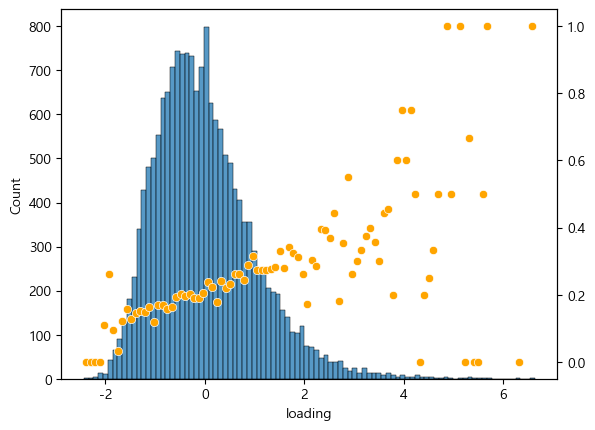

In [160]:
sns.histplot(data=df_prob3_train, x = 'loading')
s_qmean = df_prob3_train.groupby(pd.cut(df_prob3_train['loading'], bins=100))['failure'].mean()
sns.scatterplot(
    x=s_qmean.index.map(lambda x: (x.left + x.right) / 2), 
    y=s_qmean.values, ax=plt.gca().twinx(), color='orange')

In [161]:
roc_auc_score(df_prob3_train['failure'], df_prob3_train['loading'])

0.5886355699157924

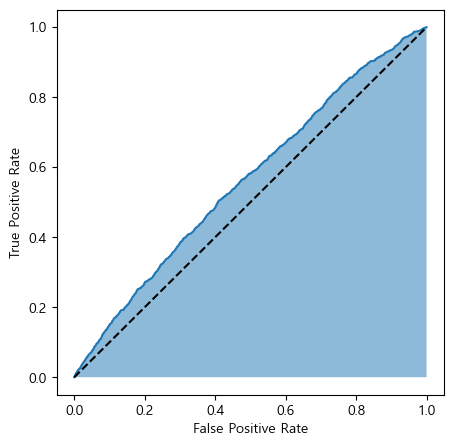

In [167]:
# ROC curve 그리기

target ='failure'
X_cols = X_lr
df_roc = pd.DataFrame({'prob': clf_lr.predict_proba(df_prob3_test[X_cols])[:, 1],
 'label': df_prob3_test[target]})
df_roc.sort_values('prob', ascending=False, inplace=True) # Positive 확률에 따른 False Positive 수를 구하기 위해 정렬
df_roc['fp'] = df_roc['label'].cumsum() # Positive 확률까지의 누적 False Positive 수
df_roc = df_roc['fp'].value_counts().sort_index().cumsum().reset_index() # False Positive에 따른 True Positive 수를 구한다.
df_roc.columns = ['tp', 'fp']
df_roc['fp'] = df_roc['fp'].shift(1).fillna(0) # shift를 해야만 False Positive 따른 True Positive 수가 맞춰진다.
df_roc['tpr'] = df_roc['tp'] / df_roc['tp'].iloc[-1] # Rate로 환산, 마지막 수는 True의 수이다.
df_roc['fpr'] = df_roc['fp'] / df_roc['fp'].iloc[-1] # Rate로 환산, 마지막 수는 False의 수이다.

plt.figure(figsize=(5, 5))
plt.plot(df_roc['fpr'], df_roc['tpr'])
plt.fill_between(df_roc['fpr'], df_roc['tpr'], np.zeros_like(df_roc['tpr']), alpha=0.5)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## 단계 3-5

loading, measurement_0 ~ 17, na_1, na_2를 후보 입력 변수로 한다. 

전진 선택법을 사용하여 이 후보 입력 변수 중에서 최적의 성능을 보이는 입력 변수의 조합을 찾는다. 

전진 선택법의 선택 기준은 prob3_train을 대상으로 5겹 층화교차검증(5-Fold stratified cross validation)을 하고 

겹외(OOF, Out-Of Fold) 성능의 평균값으로 한다. 전진 선택 과정에서 선택했던 변수를 제외하지 않는다. 

입력 변수: 본 단계 요건 참고

대상 변수: failure 

성능 지표: AUC(area under of ROC curve)

---
**함수가이드**

mlxtend.feature_selection.SequentialFeatureSelector

sklearn.linear_model.LogisticRegression, solver='lbfgs'

sklearn.metrics.roc_auc_score

sklearn.model_selection.StratifiedKFold, random_state=123, shuffle=True

문제 지시사항 외 Default 값 사용

---

In [177]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold


sfs = SequentialFeatureSelector(
    estimator = LogisticRegression(solver='lbfgs'),
    k_features="best", # 이 후보 입력 변수 중에서 최적의 성능을 보이는 입력 변수의 조합을 찾는다. 
    forward=True, # 전진 선택법을 사용하여 
    floating=False, # 전진 선택 과정에서 선택했던 변수를 제외하지 않는다. 
    scoring='roc_auc', 
    cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True)# 5겹 층화교차검증(5-Fold stratified cross validation)
)
X_sfs = ['loading'] + ['measurement_{}'.format(i) for i in range(0, 18)] + ['na_1', 'na_2']
sfs.fit(df_prob3_train[X_sfs], df_prob3_train['failure'])

SequentialFeatureSelector(clone_estimator=True,
                          cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
                          estimator=LogisticRegression(C=1.0, class_weight=None,
                                                       dual=False,
                                                       fit_intercept=True,
                                                       intercept_scaling=1,
                                                       l1_ratio=None,
                                                       max_iter=100,
                                                       multi_class='warn',
                                                       n_jobs=None,
                                                       penalty='l2',
                                                       random_state=None,
                                                       solver='lbfgs',
                                                       tol=0.0001, 

In [182]:
X_sfs_best = list(sfs.k_feature_names_)
X_sfs_best

['loading',
 'measurement_1',
 'measurement_4',
 'measurement_14',
 'measurement_17',
 'na_1']

## 단계 3-6

단계 3-5에서 찾은 최적의 입력 변수 조합으로 로지스틱 회귀모델을 사용하여 prob3_train을 학습하고 

prob3_test로 성능을 측정한 값을 B라고 한다.

입력 변수: **단계 3-5**에서 도출한 최적의 입력 변수 조합

대상 변수: failure

성능 지표: AUC(area under of ROC curve)

---
**함수 가이드**

sklearn.linear_model.LogisticRegression, solver='lbfgs'

sklearn.metrics.roc_auc_score

문제 지시사항 외 Default 값 사용

---

In [183]:
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(solver='lbfgs')
clf_lr.fit(df_prob3_train[X_sfs_best], df_prob3_train['failure'])
roc_auc_score(df_prob3_train['failure'], clf_lr.predict_proba(df_prob3_train[X_sfs_best])[:, 1])

(0.5936682060775388,)

In [185]:
B = roc_auc_score(df_prob3_test['failure'], clf_lr.predict_proba(df_prob3_test[X_sfs_best])[:, 1])
B

0.5838326230092876

In [186]:
A, B, A - B

(0.5792951262053387, 0.5838326230092876, -0.004537496803948882)

A-B값을 소수점 넷째 자리에서 반올림하여 셋째 자리까지 출력하시오

**-0.005**

# 쉬는 시간: ~ 14:22

# 문제 4

차원 축소 기법을 통한 데이터의 특성과 failure 분류 성능을 높힐 만한 요소를 살펴 본다. 

첫째로, loading을 제외하고, measurement_0 ~ 17을 입력으로 failure를 대상 변수로 Linear Discrimant Analysis(LDA) 모델을 만든다. 

범주가 두 개인 failure를 분류한다는 점에서 LDA 모델은 measurement_0 ~ 17를 한 개의 경계점으로 

failure를 최대한 정확하게 구분하도록 하나의 연속형 변수로 변환한다. 

실험 대상의 내구력을 나타낸다고 할 수 있는 LDA 변환값과 

실험에서 스프링에 가한 부하(loading)와 상관도를 측정하여, 

스프링에 따라 부하(loading)를 조정한 정도를 살펴본다.

둘째로, PCA를 사용하여 차원 감소로 failure 분류 성능에 얼마나 효과가 있을지 살펴본다.

문제3에서 사용했던, 전처리(loading 결측치 처리와 표준화 과정을 거친) 과정을 거친 prob3_train과 prob3_test를 사용한다.


## 단계 4-1

prob3_train에서 measurement_0 ~ 17을 입력으로 failure를 대상 변수로 하여 LDA(Linear Discriminant Analysis) 모델을 학습한다. 

measurement_0 ~ 17에 대한 LDA의 변환값과 loading과 스피어만 상관도 (spearman correlation)의 p-value를 구하여 A라고 한다.

입력 변수] measurement_0 ~ 17 (순서에 유의 하시오)

대상 변수] failure

---
**함수가이드**

sklearn.discriminant_analysis 제공 기능 활용

scipy.stats.spearmanr

문제 지시사항 외 Default 값 사용

---

## 단계 4-2

prob3_train에서 measurement_0 ~ 17을 대상으로 주성분분석(Principal Component Analysis, PCA) 모델을 학습한다. 

분산 설명율이 높은 순으로 주성분을 변수명을 pca_0 ~ 17하여 prob3_train에 추가하여 prob4_train을 만든다. 

prob3_test에 prob3_train를 학습했던 PCA 모델로 동일한 방법으로 pca0 ~17 파생 변수를 추가하여 prob4_test를 만든다.

입력 변수] measurement_0 ~ 17 (순서에 유의 하시오)

---
**함수가이드**

sklearn.decomposition.PCA, random_state=123

문제 지시사항 외 Default 값 사용

---


## 단계 4-3

초기에 loading을 입력 변수로 하여 prob4_train을 학습하고, prob4_test에 대한 성능을 측정한다.

여기에 pca_0에서 pca_17까지 입력 변수를 하나씩 추가 하면서, 

즉 분산 설명율이 높은 순으로 컴포넌트를 하나씩 추가하여 prob4_train를 학습하고 prob4_test의 성능을 측정 했을 때, 

최적의 성능을 보인 컴포넌트들의 분산 설명율의 합을 B라고 한다. (만일 없다면 B = 0이다.)

입력 변수: 설명 참고

대상 변수: failure

성능 지표: AUC(area under of ROC curve)

---
**함수가이드**

sklearn.linear_model.LogisticRegression, solver=’lbfgs’

---

A + B를 소수점 셋째 자리에서 반올림하여 둘째 자리까지 구하라.

Ex) 12.34

# 문제 5

랜덤포레스트 분류기(Random-Forest Classifier)의 최적의 하이퍼 파라미터(Hyper-Parameter, 초매개변수)를 탐색하고자 한다.

문제3에서 사용했던, 전처리(loading 결측치 처리와 표준화 과정을 거친) 과정을 거친 prob3_train과 prob3_test를 사용한다.

## 단계 5-1

sklearn에서 제공하는 랜덤포레스트 분류기(Random-Forest Classifier)의 하이퍼 파라미터 중 

n_estimators, max_depth 그리고 min_samples_split의 최적 조합을 탐색한다. 

탐색 값은 아래에 제공한 하이퍼 파라미터의 모든 조합이다. 

prob3_train을 대상으로 5-겹 층화교차검증(5-fold stratified cross validation)으로 

각각 층의 겹외셋(OOF set, Out-Of-Fold set)의 성능에 대한 평균을 기준으로 하이퍼 파라미터를 선택한다.

  - n_estimators: [5, 10, 15]

  - max_depth: [5, 6, 7]
  
  - min_samples_split: [256, 512]

Hint] 모든 하이퍼 파라미터의 조합의 수는 18개이다

입력 변수: loading, measurement_0 ~ 17, na_1, na_2 (순서에 유의)

대상 변수: failure

성능 지표: AUC (area under of ROC curve)

---
**함수가이드**

sklearn.ensemble.RandomForestClassifier, random_state=123 

itertools.product 필요시 사용

sklearn.model_selection.cross_val_score 필요시 사용

sklearn.model_selection.StratifiedKFold, random_state=123, shuffle=True

sklearn.model_selection.GridSearchCV 필요시 사용

---

## 단계 5-2

단계 5-1에서 구한 최적 하이퍼 파라미터로 설정한 랜덤포레스트 분류기(Random-Forest Classifier)를 사용하여 prob3_train 학습하고, 

prob3_test로 성능을 측정하여 이 값을 A라고 한다.

입력 변수: loading, measurement_0 ~ 17, na_1, na_2 (순서에 유의)

대상 변수: failure

성능 지표: AUC (area under of ROC curve)

---
**함수가이드**

sklearn.ensemble.RandomForestClassifier, random_state=123 

---


A값을 소수점 넷째 자리에서 반올림하여 3째 자리까지 출력하시오.

Ex) 0.123